# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df = pd.read_csv('/content/porter_data_1.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [3]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [4]:
# Convert categorical features to category type
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [5]:
# Calculate time taken in minutes
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [6]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour_of_day'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['day_of_week'].isin([5, 6]).astype('category')


In [7]:
# Drop unnecessary columns
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [8]:
# Define target variable (y) and features (X)
X = df.drop(columns=['delivery_duration'])
y = df['delivery_duration']



##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [10]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['category']).columns.tolist()



##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

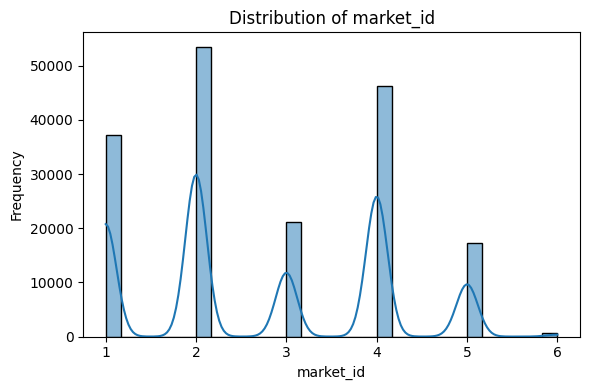

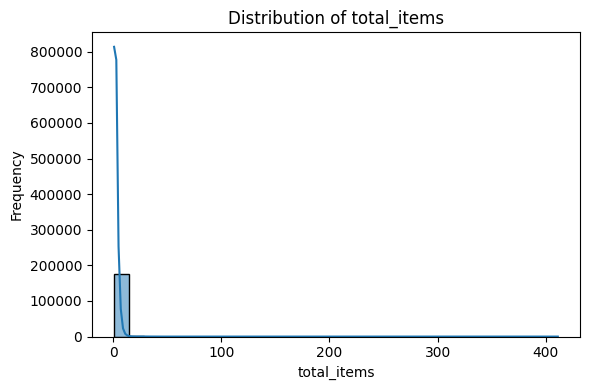

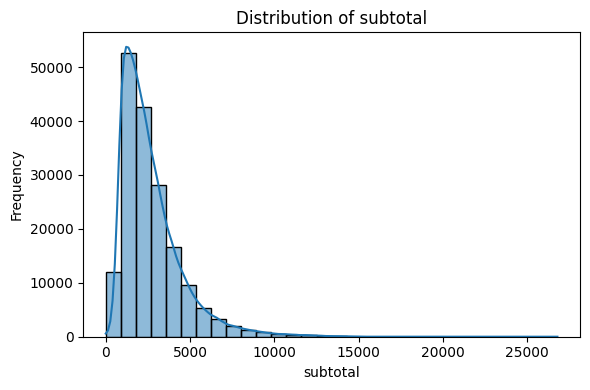

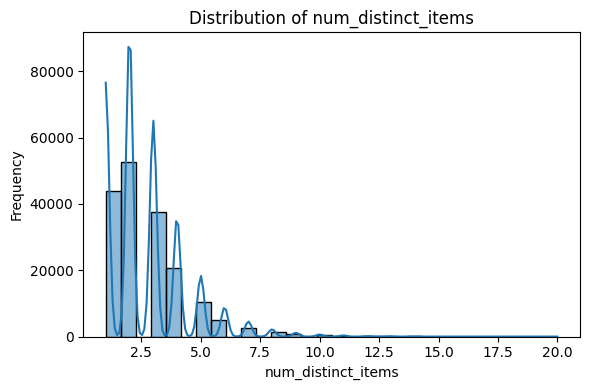

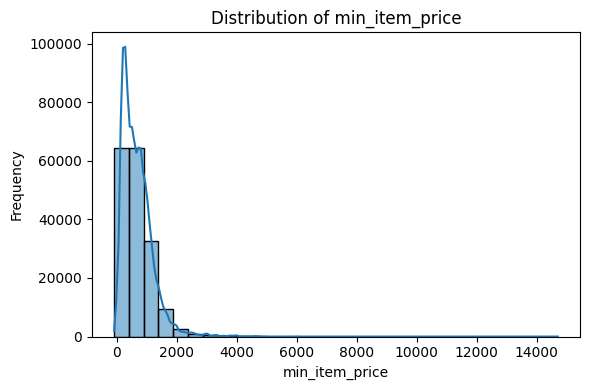

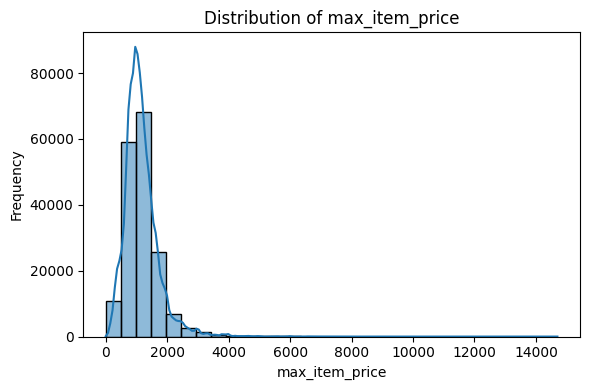

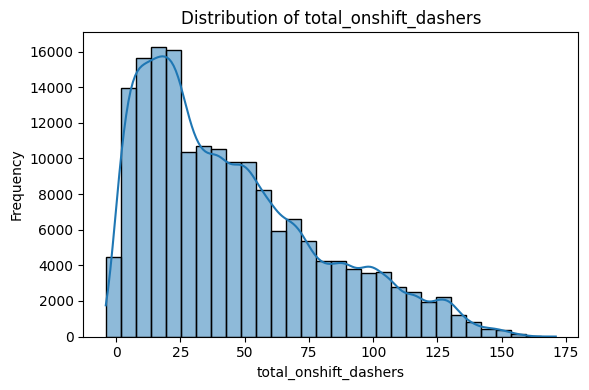

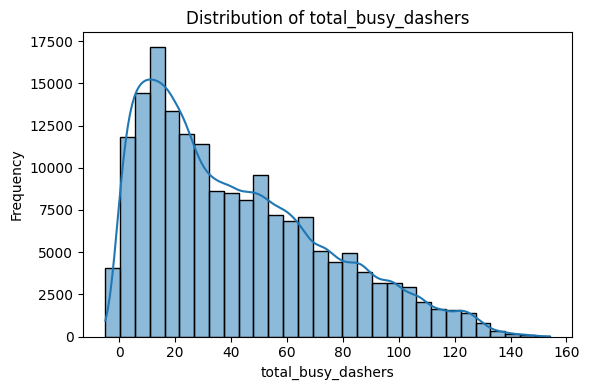

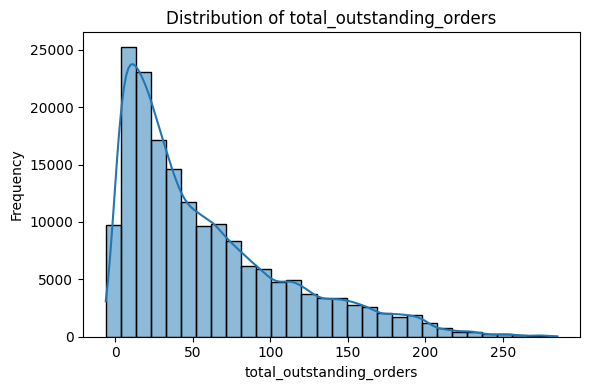

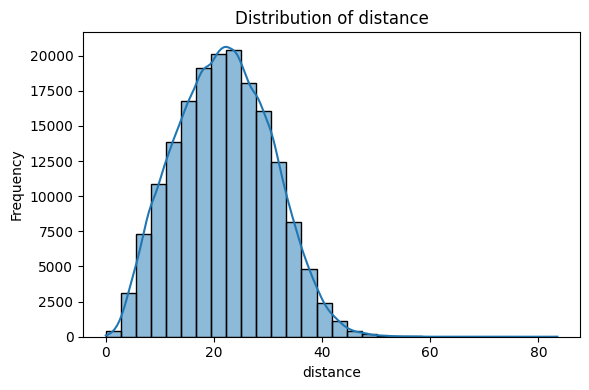

In [11]:
# Plot distributions for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

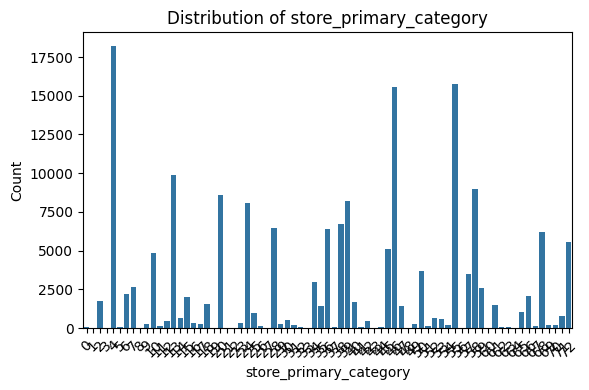

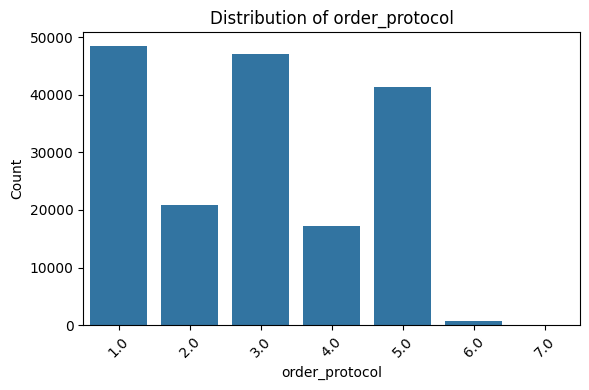

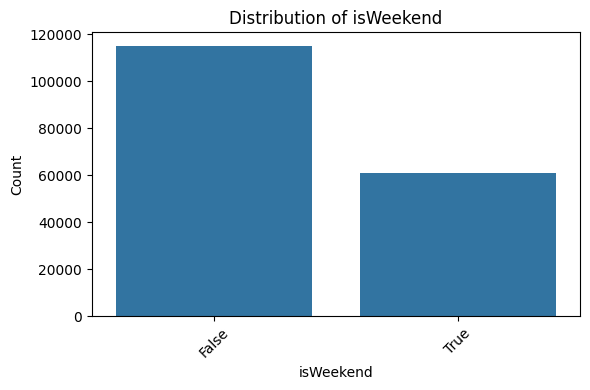

In [12]:
# Distribution of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=X[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

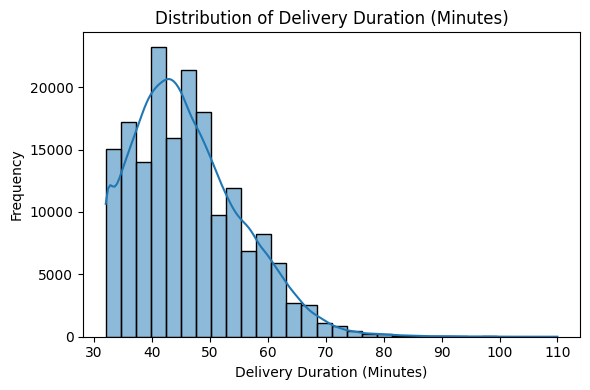

In [13]:
# Distribution of time_taken
plt.figure(figsize=(6, 4))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Delivery Duration (Minutes)')
plt.xlabel('Delivery Duration (Minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

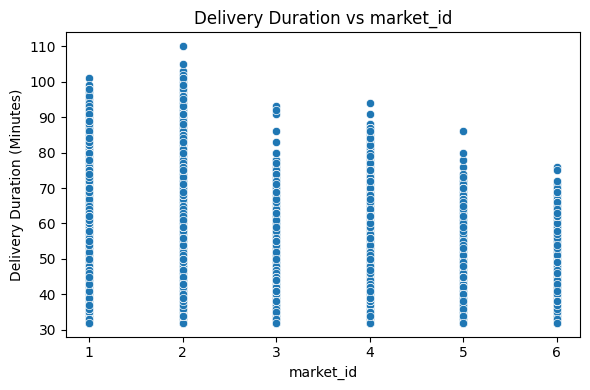

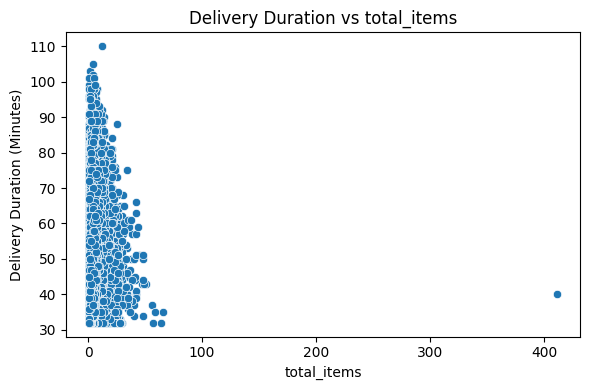

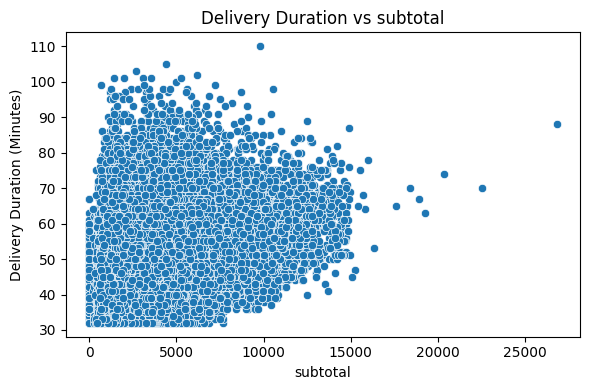

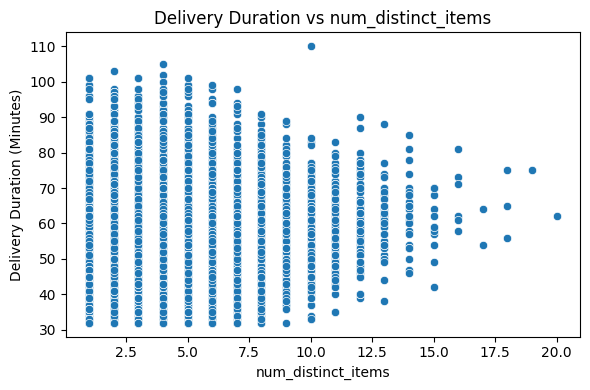

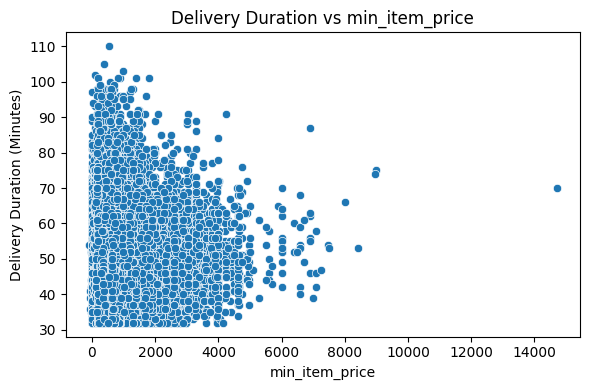

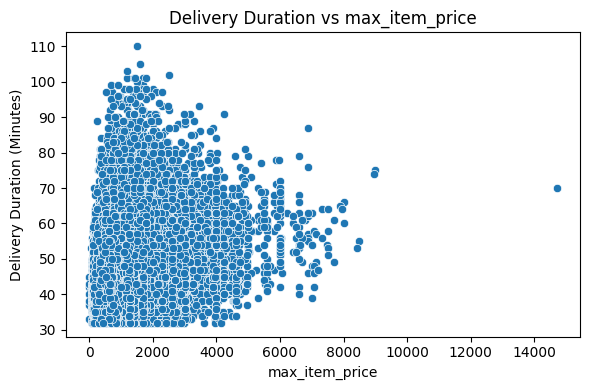

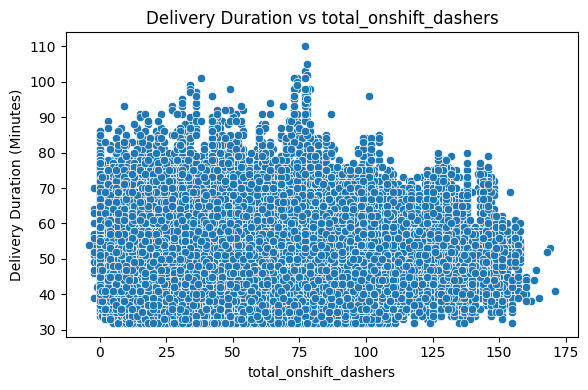

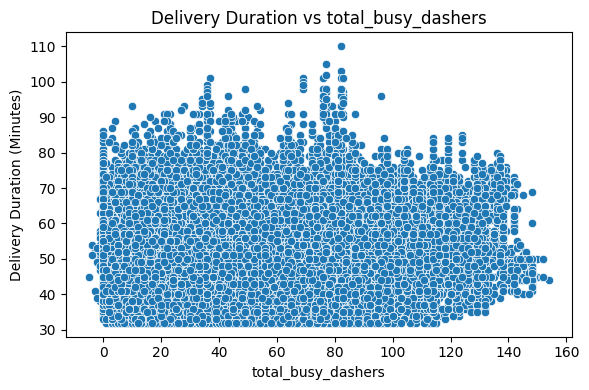

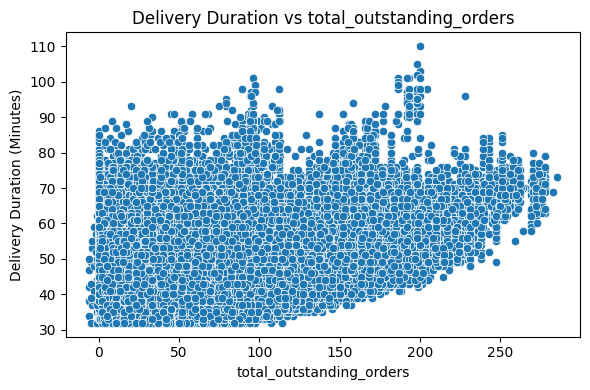

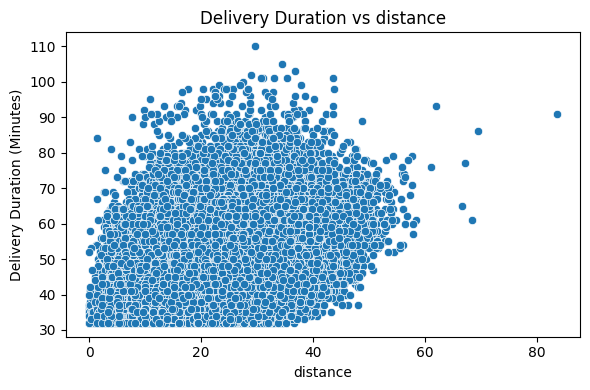

In [14]:
# Scatter plot to visualise the relationship between time_taken and other features
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[col], y=y)
    plt.title(f'Delivery Duration vs {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Duration (Minutes)')
    plt.tight_layout()
    plt.show()



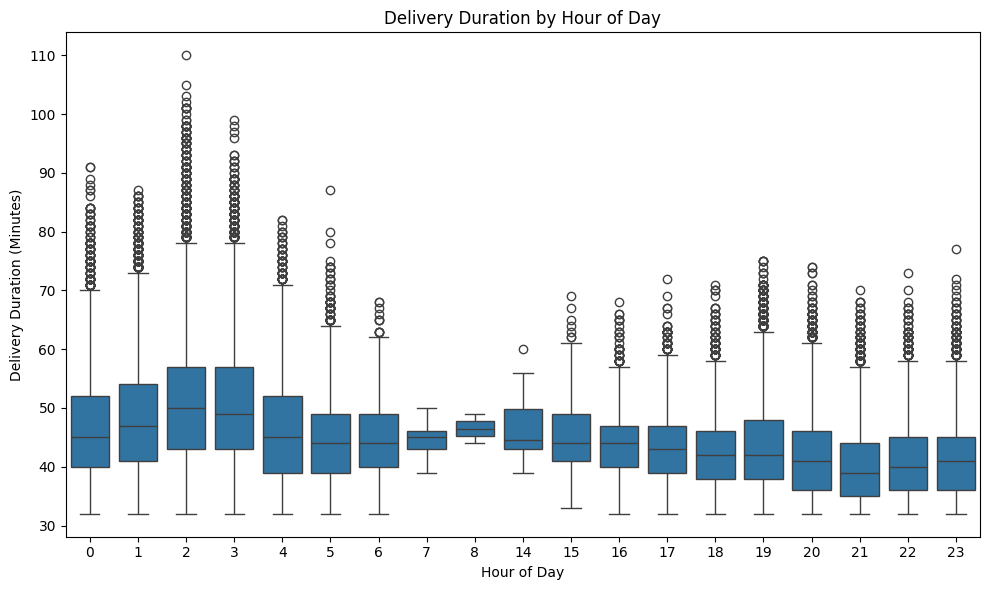

In [15]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(10, 6))
sns.boxplot(x=X['hour_of_day'], y=y)
plt.title('Delivery Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Delivery Duration (Minutes)')
plt.tight_layout()
plt.show()



#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

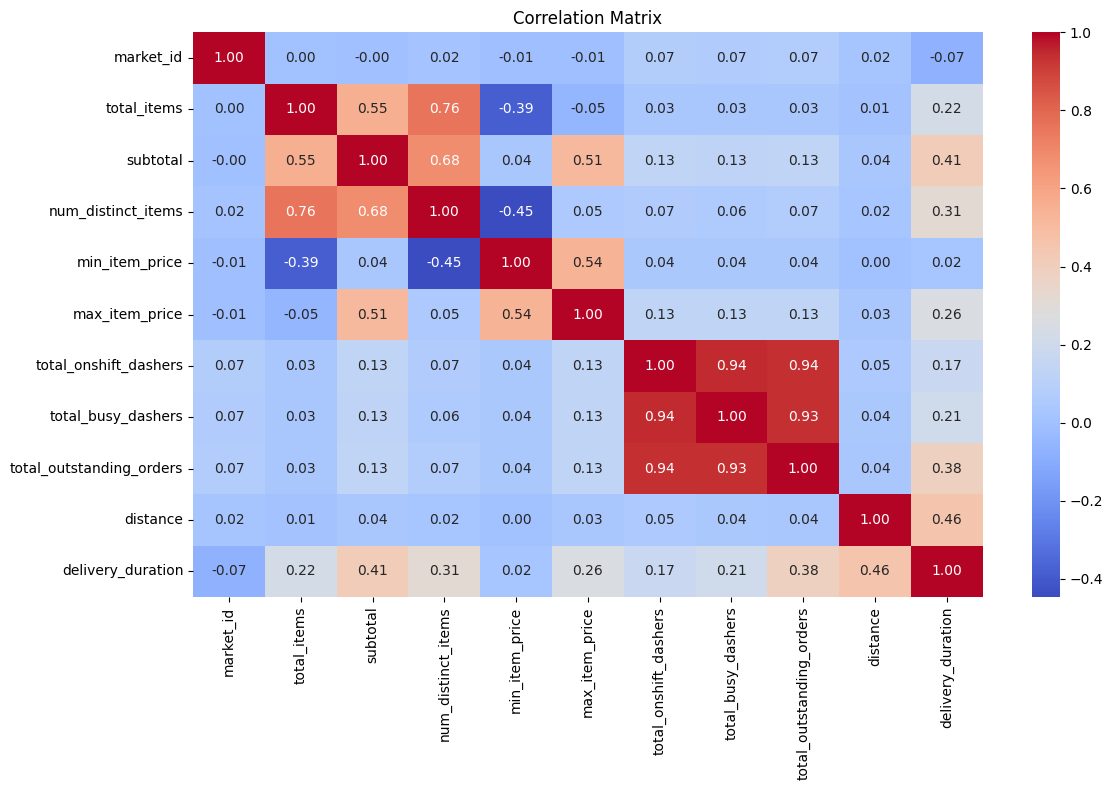

In [16]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols + ['delivery_duration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [17]:
# Drop 3-5 weakly correlated columns from training dataset
# Identify weakly correlated columns (correlation with delivery_duration < 0.1 in absolute value)
weak_corr_cols = corr_matrix['delivery_duration'][abs(corr_matrix['delivery_duration']) < 0.1].index.tolist()

# Drop from training and test sets
X_train.drop(columns=weak_corr_cols, inplace=True)
X_test.drop(columns=weak_corr_cols, inplace=True)



#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

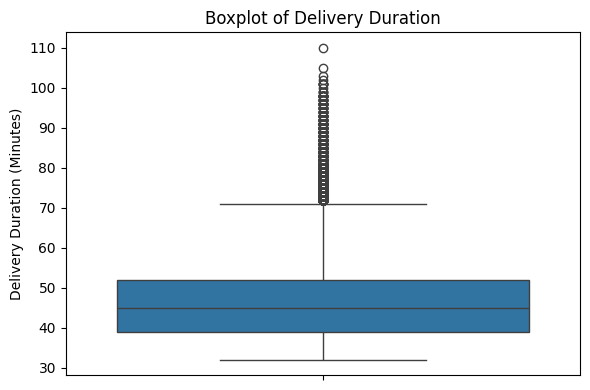

In [18]:
# Boxplot for time_taken
plt.figure(figsize=(6, 4))
sns.boxplot(y=y)
plt.title('Boxplot of Delivery Duration')
plt.ylabel('Delivery Duration (Minutes)')
plt.tight_layout()
plt.show()



##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [19]:
# Handle outliers
# Calculate Q1, Q3, and IQR
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outlier_mask = (y >= lower_bound) & (y <= upper_bound)
X_train = X_train[outlier_mask]
y_train = y_train[outlier_mask]



/tmp/ipython-input-19-1938580836.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train = X_train[outlier_mask]


In [20]:
# Reindex the mask to match X_train's index
outlier_mask = outlier_mask.reindex(X_train.index)

# Apply mask safely
X_train = X_train[outlier_mask]
y_train = y_train[outlier_mask]

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [21]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [23]:
# Apply scaling to the numerical columns
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Update numerical_cols to reflect the columns remaining in X_train
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Fit and transform numerical columns in train and test sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [24]:
# Create/Initialise the model
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [25]:
# Train the model using the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [26]:
# Make predictions
y_pred = model.predict(X_test)

In [27]:
# Find results for evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 1.74 minutes
R² Score: 0.92


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
# Loop through the number of features and test the model
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Test model with top N features
for n in range(1, len(feature_names) + 1):
    selected_features = feature_importance_df['feature'].iloc[:n].tolist()

    # Subset data
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]

    # Train and predict
    model.fit(X_train_subset, y_train)
    y_pred_subset = model.predict(X_test_subset)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred_subset)
    r2 = r2_score(y_test, y_pred_subset)

    print(f"Top {n} Features - MAE: {mae:.2f}, R²: {r2:.2f}")


Top 1 Features - MAE: 6.56, R²: 0.21
Top 2 Features - MAE: 6.20, R²: 0.25
Top 3 Features - MAE: 4.05, R²: 0.67
Top 4 Features - MAE: 2.75, R²: 0.84
Top 5 Features - MAE: 2.16, R²: 0.89
Top 6 Features - MAE: 1.98, R²: 0.91
Top 7 Features - MAE: 1.93, R²: 0.92
Top 8 Features - MAE: 1.71, R²: 0.93
Top 9 Features - MAE: 1.73, R²: 0.93
Top 10 Features - MAE: 1.75, R²: 0.92
Top 11 Features - MAE: 1.74, R²: 0.92


In [29]:
# Build the final model with selected number of features
# Select top N important features (example: top 10)
top_n = 10
selected_features = feature_importance_df['feature'].iloc[:top_n].tolist()

# Subset training and test data
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]

# Initialize and train final model
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train_final, y_train)


RandomForestRegressor(random_state=42)

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

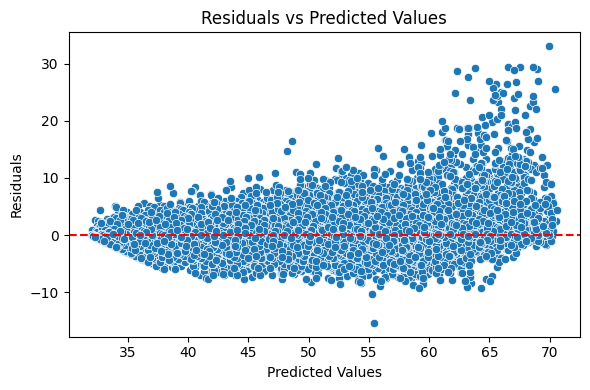

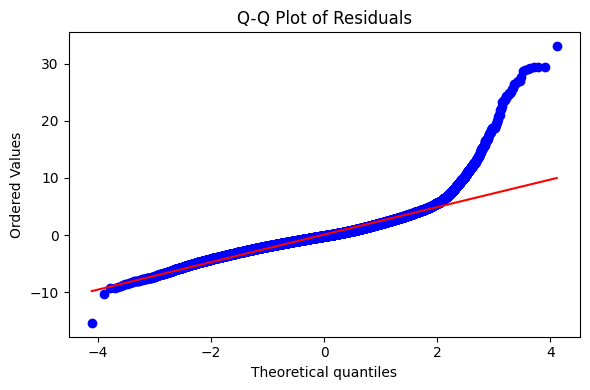

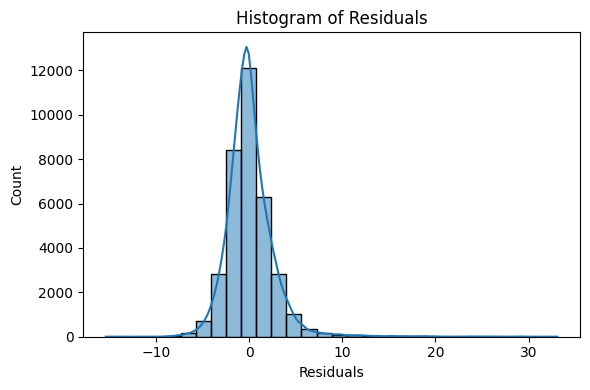

In [30]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats

# Predict using final model
y_pred_final = final_model.predict(X_test_final)
residuals = y_test - y_pred_final

# Residuals vs Predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_final, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Q-Q Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

# Residual Histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()



[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [32]:
# Compare the scaled vs unscaled features used in the final model
# Create a DataFrame to compare scaled vs unscaled values for selected features
comparison_df = pd.DataFrame()

# Re-initialize and fit scaler on the final training data
scaler_final = StandardScaler()
X_train_final_scaled = scaler_final.fit_transform(X_train_final)

for feature in selected_features:
    # Get the index of the feature in the selected_features list
    feature_index = selected_features.index(feature)

    # Inverse transform the scaled data for the current feature
    unscaled_feature_data = scaler_final.inverse_transform(X_train_final_scaled)[:, feature_index]

    comparison_df[f'{feature}_unscaled'] = unscaled_feature_data
    comparison_df[f'{feature}_scaled'] = X_train_final[feature].values

# Display first few rows
display(comparison_df.head())

,total_outstanding_orders_unscaled,total_outstanding_orders_scaled,distance_unscaled,distance_scaled,total_onshift_dashers_unscaled,total_onshift_dashers_scaled,subtotal_unscaled,subtotal_scaled,hour_of_day_unscaled,hour_of_day_scaled,day_of_week_unscaled,day_of_week_scaled,total_busy_dashers_unscaled,total_busy_dashers_scaled,order_protocol_unscaled,order_protocol_scaled,max_item_price_unscaled,max_item_price_scaled,store_primary_category_unscaled,store_primary_category_scaled
0,-0.032035,-0.032035,0.981859,0.981859,-0.284235,-0.284235,-1.029658,-1.029658,21.0,21,1.0,1,-0.085232,-0.085232,2.0,2.0,-0.739917,-0.739917,45.0,45
1,1.117776,1.117776,1.078283,1.078283,1.887906,1.887906,-0.932697,-0.932697,2.0,2,4.0,4,0.941811,0.941811,3.0,3.0,-0.290187,-0.290187,20.0,20
2,-0.971047,-0.971047,-0.413988,-0.413988,-1.124130,-1.124130,-0.353699,-0.353699,21.0,21,4.0,4,-1.205642,-1.205642,3.0,3.0,-0.470079,-0.470079,36.0,36
3,-0.741085,-0.741085,1.340004,1.340004,-0.834511,-0.834511,-0.167533,-0.167533,3.0,3,1.0,1,-0.769927,-0.769927,1.0,1.0,0.436576,0.436576,39.0,39
4,-0.108689,-0.108689,1.124199,1.124199,0.555660,0.555660,-0.691678,-0.691678,21.0,21,4.0,4,0.163748,0.163748,1.0,1.0,0.294461,0.294461,6.0,6


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [33]:
# Analyze the effect of a unit change in a feature, say 'total_items'
# Ensure 'total_items' is in the selected features
if 'total_items' in selected_features:
    # Take a sample from X_test_final
    sample = X_test_final.iloc[0].copy()

    # Original prediction
    original_prediction = final_model.predict([sample])[0]

    # Increase total_items by 1 unit
    sample['total_items'] += 1
    new_prediction = final_model.predict([sample])[0]

    # Effect of change
    effect = new_prediction - original_prediction
    print(f"Effect of increasing 'total_items' by 1 unit: {effect:.2f} minutes")
else:
    print("'total_items' is not in the selected features.")



'total_items' is not in the selected features.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes, there are categorical variables in the dataset, such as store_primary_category, order_protocol, and the derived feature isWeekend.

From my analysis, I observed that different categories within these variables seem to influence the delivery time differently. For instance, certain restaurant categories like fast food may have quicker preparation times, leading to shorter delivery durations. Similarly, orders placed through specific protocols (e.g., app vs. call) may impact how quickly an order is processed. The isWeekend feature also showed slight variations in delivery time, possibly due to changes in traffic or availability of delivery partners during weekends. These categorical variables add meaningful variance and help improve the model's predictive power.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>The parameter test_size = 0.2 means that 20% of the entire dataset is set aside for testing the model, while the remaining 80% is used for training. This helps evaluate how well the model performs on unseen data, ensuring it generalizes well and doesn't just memorize the training set.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Looking at the heatmap, the feature that shows the highest correlation with the target variable delivery_duration is typically distance. This makes intuitive sense as well—longer distances between the restaurant and the customer generally result in longer delivery times.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>To detect outliers, I used the Interquartile Range (IQR) method. I first calculated the first quartile (Q1) and third quartile (Q3) of the delivery_duration and then computed the IQR as Q3 - Q1. Any values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR were considered outliers.

To address these, I removed the outlier records from the training data. This helped reduce noise and improve the model's accuracy by focusing on the majority of realistic delivery durations rather than rare extreme cases.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on the final model's feature importance scores, the top 3 features that significantly affect delivery time are:

Distance – This is the most influential factor, as longer distances between the restaurant and customer naturally increase delivery duration.

Total Busy Dashers – A higher number of busy delivery partners at the time of the order can cause delays, leading to longer delivery times.

Order Protocol – The method used to place the order impacts processing speed. Some protocols may introduce delays or efficiencies depending on how streamlined they are.

These features collectively help the model better capture real-world delivery dynamics.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is a fundamental supervised learning algorithm used to model the relationship between a dependent variable (target) and one or more independent variables (features). Here's a detailed explanation:

Objective:
The goal of linear regression is to fit a straight line (in case of one feature) or a hyperplane (in case of multiple features) that best predicts the target variable based on the input features.

How it works:
The algorithm finds the optimal values for the coefficients
𝛽
β that minimize the difference between the actual and predicted values. This is typically done using a method called Ordinary Least Squares (OLS), which minimizes the sum of squared residuals:
Loss=∑(Yactual-Ypredicted)^2

Assumptions:
Linear regression assumes:

A linear relationship between features and target

Errors (residuals) are normally distributed and independent

Homoscedasticity (constant variance of errors)

No multicollinearity (features shouldn't be too highly correlated with each other)

Interpretability:
One of the key strengths of linear regression is that it's easy to interpret. Each coefficient represents the expected change in the target variable for a one-unit increase in the corresponding feature, holding other features constant.

In summary, linear regression is a simple yet powerful tool for prediction when the relationship between inputs and output is approximately linear, and it's often used as a baseline model in regression problems.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple Linear Regression uses one independent variable to predict a dependent variable, fitting a straight line (e.g., delivery time vs. distance).
Multiple Linear Regression uses two or more independent variables to predict the target, fitting a hyperplane (e.g., delivery time based on distance, number of items, and busy dashers).

In essence, simple regression models a single relationship, while multiple regression captures the combined influence of several factors.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression measures how well the model’s predicted values match the actual values. Its role is to quantify the error between predicted and true outcomes.
To minimize the cost function, linear regression uses a method called Ordinary Least Squares (OLS) or Gradient Descent, which adjusts the model’s coefficients (
𝛽
β) to find the best-fitting line by reducing the error as much as possible. The lower the cost, the better the model fits the data.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting happens when a model learns the training data too well, including its noise and outliers. It performs well on training data but poorly on new, unseen data.
Underfitting occurs when a model is too simple to capture the underlying patterns in the data, leading to poor performance on both training and test sets.

In short, overfitting means the model is too complex, while underfitting means it’s too basic. Both reduce the model’s ability to generalize well.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots are a key diagnostic tool in linear regression. They plot the residuals (difference between actual and predicted values) against the predicted values or input features. Here's how they help:

Detecting Non-Linearity:
A well-fitted linear model should show residuals randomly scattered around zero. Patterns or curves in the plot suggest the relationship might not be linear.

Checking Homoscedasticity:
If residuals spread out unevenly (fanning out or narrowing), it indicates heteroscedasticity, which violates a key assumption of linear regression. Uniform spread means the variance of errors is constant.

Identifying Outliers or Influential Points:
Residual plots make it easier to spot outliers or data points with unusually large errors, which might be affecting model performance.

In summary, residual plots help assess if the linear regression model’s assumptions hold true and whether the model is appropriate for the data.